# Homework 0: Getting Started (10 points)

## Due Sept 11th, 2024 by 10 PM

For this initial assignment, our primary goal is to familiarize you with Python and Pandas.

**This class assumes you are comfortable programming in Python.**

We will be using **Google Colab** to do the majority of work in the class, since it offers a standard environment regardless of your personal machine. This very file is a Jupyter **notebook** that you can edit and use to run Python code. Its file extension is “.ipynb” for (I)nteractive (Py)thon (N)ote(b)ook.

Notebooks are divided into Cells. Some Cells are text (written in Markdown). You won’t need to edit these. The other Cells are executable code and will have `[ ]` to the left of them. After running one of these Cells, a number will appear inside the brackets, indicating the order in which the Cells were run.


<br>

#### **Please make a COPY of this notebook!**

Please make a COPY of this notebook when you are getting started; nobody should have edit privileges which means that while you can type and run cells here, **it will NOT save**. Make a copy to your own Colab!

# Part 1: PennGrader





Next you'll need to set up the PennGrader, which we'll be using throughout the semester to help you with your homeworks.

PennGrader is not only **awesome**, but its initial version was built by an equally awesome person: CIS 5450 alumnus, Leo Murri, who later became a TA for the course.  Today Leo works as a data scientist at Amazon!

PennGrader was developed to provide students with *instant* feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database.

In [1]:
%%capture
!pip install penngrader-client

Let's try it out! Fill in the cell below with your 8-digit Penn ID and then run the following cell to initialize the grader.

In [2]:
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
# TO ASSIGN POINTS TO YOU IN OUR BACKEND

# TODO: Assign the STUDENT_ID variable your PENN-ID as an integer
STUDENT_ID = 13294482

In [3]:
# don't touch this cell -- this tells PennGrader where to submit your results
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Overwriting notebook-config.yaml


In [4]:
from penngrader.grader import *

# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
grader = PennGrader('notebook-config.yaml', "cis5450_fall24_HW0", STUDENT_ID, STUDENT_ID)

PennGrader initialized with Student ID: 13294482

Make sure this correct or we will not be able to store your grade


# Part 2: Your First CIS 5450 Notebook

The rest of the assignment will try to illustrate a few aspects of data analytics...  Don't be concerned if you don't yet know all of the operations, libraries, etc. because that's what we'll be covering soon!

## 2.1 A Simple Program to Read from the Web with Pandas
The cell below uses the **Pandas** library to read a table from the given web page (the Wikipedia information on films in the year 2024).  The code loads this into a list of **DataFrames** called `films_2024`.  We then pull the table at the right index, then do some simple **data wrangling** on `top_films` to set up the appropriate types.

Select the Cell below and then select the Run button which appeared over the brackets.

In [6]:
!pip install money-parser

In [7]:
import pandas as pd
from money_parser import price_dec

def extract_number(x):
  items = str(x).split('[')
  return round(price_dec(items[0]) / 1000000, 2)

films_2024 = pd.read_html('https://en.wikipedia.org/wiki/2024_in_film')

top_films = films_2024[2]
top_films = top_films.set_index("Rank")

top_films['Revenue (millions)'] = top_films['Worldwide gross'].apply(extract_number)
top_films

,Title,Distributor,Worldwide gross,Revenue (millions)
Rank,,,,
1,Inside Out 2 †,Disney,"$1,675,131,031",1675.13
2,Deadpool & Wolverine †,Disney,"$1,287,237,740",1287.24
3,Despicable Me 4 †,Universal,"$929,508,000",929.51
4,Dune: Part Two,Warner Bros.,"$711,844,358",711.84
5,Godzilla x Kong: The New Empire,Warner Bros.,"$568,721,707",568.72
6,Kung Fu Panda 4,Universal,"$548,461,992",548.46
7,YOLO,China Film,"$484,459,662[3][4]",484.46
8,Pegasus 2,China Film,"$476,036,718[5][6]",476.04
9,Successor [zh] †,Wanda,"$462,387,755[7][8]",462.39


Can we programmatically compute how many entries were scored as top films?

In [8]:
# You can use the Python len() function on a dataframe to figure out how many rows!

# TODO: Update dataframe_length with your code here!
dataframe_length = len(top_films)

In [9]:
# Run this cell to submit to PennGrader!

grader.grade(test_case_id = 'length_test', answer = dataframe_length)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.



## 2.2 Something a Little More Fun
Running the cell below will create a scatter plot.

**Your task is to edit this cell such that:**

1. The text (which says “CIS5450Student”) should be replaced with your full name.
2. The number of values sampled should be 50, and you should  change the figure title to match!

4. The x-axis should be labeled “Index”.

You may run this cell repeatedly to see the output.

Text(0.5, 1.0, '50 data points from Changbang Li')

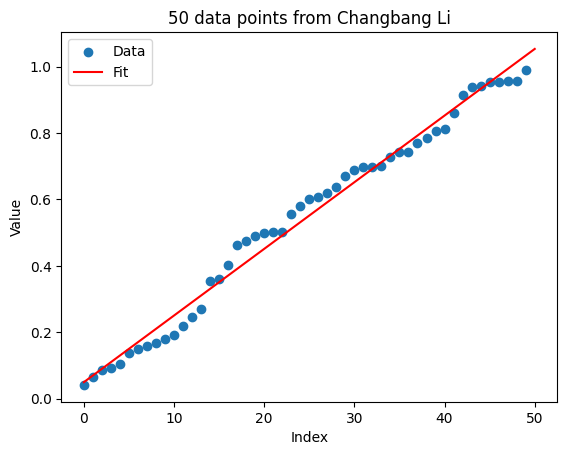

In [10]:
# We’ll be using Matplotlib to plot a visualization
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Create 10 random numbers and sort them
NUM_PTS_TO_SAMPLE = 50
x = np.arange(0, NUM_PTS_TO_SAMPLE)
y = np.sort(np.random.rand(NUM_PTS_TO_SAMPLE))

# fit a line (polynomial with degree 1) through the data
slope, intercept = np.polyfit(x, y, 1)

# plot our initial random points
plt.scatter(x, y, label="Data")

# plot our line-of-best-fit over the data
fit_x = np.linspace(0, NUM_PTS_TO_SAMPLE, 100)
fit_y = slope * fit_x + intercept
plt.plot(fit_x, fit_y, color="red", label="Fit")
plt.ylabel("Value")
plt.xlabel("Index")
plt.legend()

# give the plot a title based on the variable `student`
student = "Changbang Li"
plt.title(f"50 data points from {student}")

The following test cell prints your name and tests whether you followed the directions.

In [11]:
print("Your name is:", student)

# Run this cell to submit to PennGrader!
grader.grade(test_case_id = 'name_test', answer = student)

Your name is: Changbang Li
Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Part 4: Submitting Your Homework

First, note that it's easy to "break" your notebook by changing something...  So you should *ALWAYS* clear output and re-run your code, just to make sure that hasn't happened. When you are done, select the "Runtime" menu at the top of the window. Then, select "Restart and run all". Please make sure all cells complete!

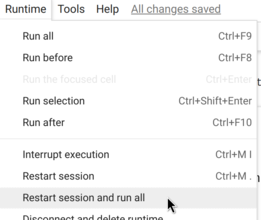


## 4.1 Submission to Gradescope

Now go to the File menu and choose "Download .ipynb" and also "Download .py".  Go to [Gradescope](https://www.gradescope.com/courses/845156) (you can access Gradescope through Canvas if the link doesn't work) and:

1. (If you didn't read the above carefully) from "File" --> Download *both* .ipynb and .py files
1. Rename these downloaded files `homework0.ipynb` and `homework0.py`, respectively
1. Sign in using your Penn email address (if you are a SEAS student we recommend using the Google login) and select the correct class
1. Select Homework 0
1. Upload both files
1. PLEASE CHECK THE AUTOGRADER OUTPUT TO ENSURE YOUR SUBMISSION IS PROCESSED CORRECTLY!

**NOTE: in future HW, we will apply a penalty if we have to re-upload your submission to Gradescope after the deadline.**

You should be set! Note that this assignment has 8 autograded points and 2 manually graded points! The autograded points will show upon submission, but the manually graded portion will be graded by your TAs after the deadline has passed.